In [1]:
from BaroSphere import BaroSphere
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy 

plt.style.use('dark_background')
B=BaroSphere(
    ntrunc=85,
    dt=1800,
    damping_order=4,
    efold=12*3600
)

/home/rfajber/code/Barotropic/BaroSphere.py:77: RuntimeWarning: invalid value encountered in true_divide
  self.w_indxm_damp=self.indxm/self.indxm


In [2]:
#total number of steps to take
Nsteps = int(50*24*3600/B.dt)
#how often to take snapshots
dN_snap = int(6*3600/B.dt)
#total number of snapshots
Nsnaps = int(Nsteps/dN_snap)

print(Nsteps,dN_snap,Nsnaps)

#first time step 
vrt0 = B.vrtg_unstable_jet(m=12,A=8e-5)
vrt1 = vrt0 + B.dt * B.vrt_time_tendency(vrt0)

#add these into B
B.vrtg_m1 = vrt0
B.vrtg = vrt0

#initialize the snapshots
vrt = np.zeros([Nsnaps+1,B.nlat,B.nlon])
vrt[0] = vrt0
ksnap = 1

#main time loop
for i in range(1,Nsteps):
    B.RA_leapfrog()
    if i%dN_snap == 0:
        print(i,i*B.dt/3600/24,ksnap)
        vrt[ksnap] = np.copy(B.vrtg)
        ksnap += 1

4800 24 200
24 0.25 1
48 0.5 2
72 0.75 3
96 1.0 4
120 1.25 5
144 1.5 6
168 1.75 7
192 2.0 8
216 2.25 9
240 2.5 10
264 2.75 11
288 3.0 12
312 3.25 13
336 3.5 14
360 3.75 15
384 4.0 16
408 4.25 17
432 4.5 18
456 4.75 19
480 5.0 20
504 5.25 21
528 5.5 22
552 5.75 23
576 6.0 24
600 6.25 25
624 6.5 26
648 6.75 27
672 7.0 28
696 7.25 29
720 7.5 30
744 7.75 31
768 8.0 32
792 8.25 33
816 8.5 34
840 8.75 35
864 9.0 36
888 9.25 37
912 9.5 38
936 9.75 39
960 10.0 40
984 10.25 41
1008 10.5 42
1032 10.75 43
1056 11.0 44
1080 11.25 45
1104 11.5 46
1128 11.75 47
1152 12.0 48
1176 12.25 49
1200 12.5 50
1224 12.75 51
1248 13.0 52
1272 13.25 53
1296 13.5 54
1320 13.75 55
1344 14.0 56
1368 14.25 57
1392 14.5 58
1416 14.75 59
1440 15.0 60
1464 15.25 61
1488 15.5 62
1512 15.75 63
1536 16.0 64
1560 16.25 65
1584 16.5 66
1608 16.75 67
1632 17.0 68
1656 17.25 69
1680 17.5 70
1704 17.75 71
1728 18.0 72
1752 18.25 73
1776 18.5 74
1800 18.75 75
1824 19.0 76
1848 19.25 77
1872 19.5 78
1896 19.75 79
1920 20.0 80
1

/tmp/ipykernel_50725/3838267251.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

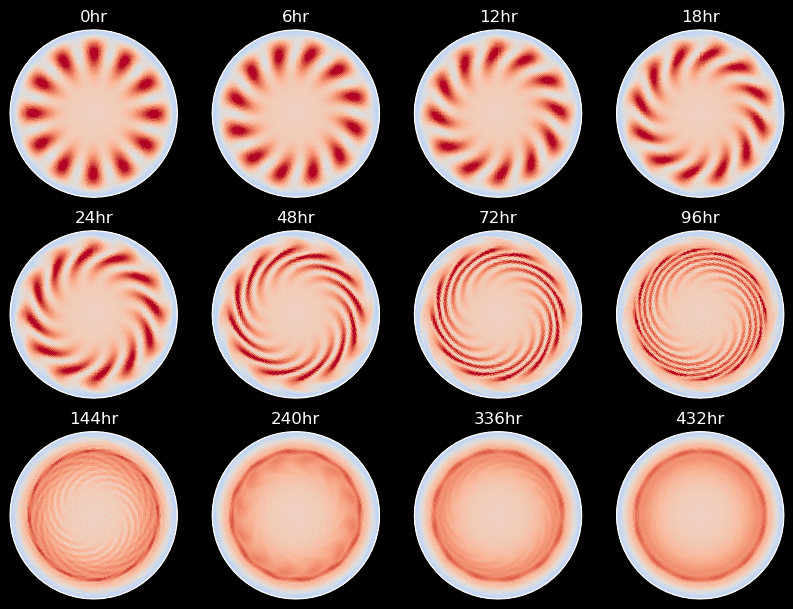

In [4]:
plt.clf()
plt.figure(0,figsize=(10,10),dpi=100)
lim=5e-5
il=np.hstack([np.arange(0,4),np.arange(4,17,4),np.arange(24,24+16*8,16)])
crs = cartopy.crs.RotatedPole(pole_longitude=0, pole_latitude=0)
for i in range(0,12):
    ax=plt.subplot(4,4,i+1,projection=cartopy.crs.Orthographic(0, 
    -0))
    ax.pcolormesh(B.lons1,B.lats1,vrt[il[i]],
    vmin=-0.5e-4,vmax=0.5e-4,cmap=plt.cm.coolwarm,
    transform=crs)
    plt.title(str(il[i]*6)+'hr')
plt.tight_layout()    


In [4]:
il[-1]

136